# PRÁCTICA 0: PYTHON


# Objetivo de la práctica:
Implementar un algoritmo de integración numérica basado
en el método de Monte Carlo.


# Imports

In [2]:
import numpy as np
import random
import math as mt
import matplotlib.pyplot as plt
import scipy
from sympy import *
import time as tm


# Definicion de la función

Definimos la función de la curva con la que trabajaremos a lo largo de la práctica:

In [3]:
#https://www.mathway.com/es/popular-problems/Algebra/228028
def funcion(x):
    return -((x-1)**2 - 0.5)

# Cálculo valores para Método MonteCarlo

Para poder aplicar la fórmula de la integración del método MonteCarlo, necesitamos averiguar diferentes valores. En primer lugar averiguaremos el máximo de la función. Esta puede ser averiguada con bucles o sin bucles. Más adelante estos valores serán comparados.

In [8]:
def maxYLoop(func):
     max = 0
        
     #Para todo el rango de valores entre a, b guardamos el valor maximo de su valor y correspondiente (func(i))
     for i in s:
        if(func(i) > max):
            max = func(i)
     return max
    
maxYLoop(funcion)

0.4999999899979997

Sin bucles:

In [6]:
def maxYNoLoop(func):
    maxNoLoop = np.amax(func(s))
    return maxNoLoop
    
maxYNoLoop(funcion)

0.4999999899979997

# Representación de la función

Para comprobar que esta función es lo que nosotros queremos, pasaremos a representarla con pyplot. Para ello establecemos los límites en el eje x (a-->b). Utilizaremos los especificados en el enunciado de la práctica

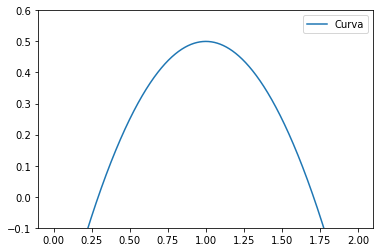

In [7]:
a = 0
b = 2
s = np.linspace(a, b, 10000)
plt.ylim(bottom=-0.1)

#En el top habrá que poner más adelante el punto máximo de la funcion (M)
plt.ylim(top= maxYNoLoop(funcion) + 0.1)

plt.plot(s, funcion(s))
plt.legend(['Curva'])

Mostramos dónde se encuentra el máximo de la curva:

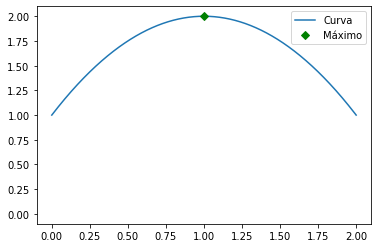

In [126]:
a = 0
b = 2
s = np.linspace(a, b, 10000) #Creamos un espacio de puntos en el eje X
plt.ylim(bottom=-0.1)

#En el top habrá que poner más adelante el punto máximo de la funcion (M)
plt.ylim(top= maxYNoLoop(funcion) + 0.1)

plt.plot(s, funcion(s))
plt.plot((a+b)/2, maxYNoLoop(funcion), 'gD') #representamos el máximo Y de la curva. Suponemos que es simétrica

plt.legend(['Curva', 'Máximo'])

En segundo lugar, calcularemos el número de puntos que quedan bajo la función y el total de puntos:

Definimos un método para la generación aleatoria de puntos

In [109]:
def puntos_mc(fun, a, b, num_puntos=10000):
    X = np.random.uniform(a, b, num_puntos) #puntos aleatorios [a:b]
    Y = np.random.uniform(0, maxYLoop(fun), num_puntos) #puntos aleatorios [0:M] siendo M, la altura máxima de la curva
    return (X, Y)

-Con bucle:

In [110]:
def integra_mc(fun, a, b, num_puntos=10000):
    
    #calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando
    #para ello num_puntos aleatoriamente
    puntos = puntos_mc(fun, a, b)
    
    NDebajo = 0
    for i in range(num_puntos):
        if(puntos[1][i] < fun(puntos[0][i])):
            NDebajo+=1 #Contabilizamos los puntos que cumplen la condición establecida. Estar dentro de la curva
            
    resultado = (NDebajo * (b-a) * maxYLoop(fun)) / num_puntos #Integramos
    print(NDebajo)
    return resultado
integra_mc(funcion, a, b)

8280


3.3119999834366878

-Sin bucle:

In [111]:
#Igual a integra_mc pero sin bucles
def integra_mc_noLoop(fun, a, b, num_puntos=10000):
    puntos = puntos_mc(fun, a, b)
    totalPointsArr = np.array(puntos)
    conditionPoints = (totalPointsArr[1] < fun(totalPointsArr[0])).sum()
    print(conditionPoints)
    resultado = (conditionPoints*(b-a)*maxYLoop(fun))/num_puntos
    return resultado
integra_mc_noLoop(funcion, a, b)

8284


3.3135999834286856

Como podemos observar salen resultados muy parejos. En cada ejecución estos numeros variarán ya que se 'disparan' puntos en sitios
aleatorios tanto en X como en Y. Estamos lanzando puntos 'a ciegas', es decir, no tenemos representación.

# Representación de los puntos junto con la curva

A continuación observaremos una gráfica en la que podremos ver la curva junto con los puntos

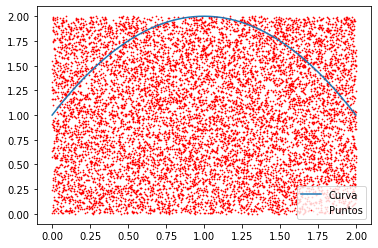

In [127]:
a = 0
b = 2
s = np.linspace(a, b, 10000) #Creamos un espacio de puntos en el eje X
plt.ylim(bottom=-0.1)

#En el top habrá que poner más adelante el punto máximo de la funcion (M)
plt.ylim(top= maxYNoLoop(funcion) + 0.1)

plt.plot(s, funcion(s))

puntos = puntos_mc(funcion, a, b)
plt.scatter(puntos[0], puntos[1], s=0.5,c='red') #Representamos puntos aleatorios en X, Y

plt.legend(['Curva', 'Puntos'])

Ya con los puntos generados aleatoriamente en la gráfica, para la parte final de la práctica (comparación de tiempos y cálculo de la integral), utilizaremos la variable puntos creada en la celda anterior.